# Impôt sur les revenus, décote et quotient familial

<p class="last_update">Dernière date de mise à jour du document : avril 2022</p>

TODO description

Le taux marginal d’imposition (TMI) d’un contribuable correspond au taux auquel est imposée la dernière tranche de son revenu.

## Références

* Taux d'imposition marginal : https://fr.wikipedia.org/wiki/Taux_d%27imposition_marginal
* Quel est le barème de l'impôt sur le revenu ? (exemples d'application) : https://www.service-public.fr/particuliers/vosdroits/F1419

## Institutions concernées

## Publications & Aggrégats

* [nom](url)

## Evolution de l'impôt selon les ressources et la situation familiale

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from openfisca_france import FranceTaxBenefitSystem
from openfisca_france.scenarios import init_single_entity

tax_benefit_system = FranceTaxBenefitSystem()

current_period = 2022
STEPS_COUNT = 100
IRPP_LAST_BRACKET_THRESHOLD = 160_336  # 01.2022+


def dessine_courbe(x_values, y_values, x_label, y_label, graph_label=None):
    sns.set_theme(style="darkgrid")
    sns.lineplot(x=x_values, y=y_values)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend([graph_label])

    plt.show()

## Célibataire sans enfants

In [ ]:
scenario_sans_enfants = init_single_entity(
    tax_benefit_system.new_scenario(),
    axes=[
        [
            dict(
                count=STEPS_COUNT,
                min=0,
                max=IRPP_LAST_BRACKET_THRESHOLD + 100_000,
                name="rni",  # the variable that will evolve 'count' times between 'min' and 'max' values
            ),
        ],
    ],
    period=current_period,
    parent1=dict(
        statut_marital="celibataire",
    ),
)

simulation_sans_enfants = scenario_sans_enfants.new_simulation()

# on récupère la valeur de rni de l'axe
rni = simulation_sans_enfants.calculate("rni", 2022)
ir_taux_marginal = simulation_sans_enfants.calculate("ir_taux_marginal", current_period)

dessine_courbe(
    rni, ir_taux_marginal, "RNI", "TAUX MARGINAL D'IMPOSITION", "TMI selon RNI"
)

### Zoom sur plafonnement du quotient familial et décote

In [ ]:
# https://legislation.fr.openfisca.org/ip_net
ir_brut = simulation_sans_enfants.calculate("ir_brut", current_period)

ip_net = simulation_sans_enfants.calculate("ip_net", current_period)
# ip_net en partie composé de ir_plaf_qf et de decote
ir_plaf_qf = simulation_sans_enfants.calculate("ir_plaf_qf", current_period)
decote = simulation_sans_enfants.calculate("decote", current_period)

sns.set_theme(style="darkgrid")

# NB_STEPS_READABLE_DECOTE = 15
sns.lineplot(x=rni[:15], y=ir_brut[:15])
sns.lineplot(x=rni[:15], y=ir_plaf_qf[:15])  # = ir_plaf_qf, cas sans enfant
sns.lineplot(x=rni[:15], y=ip_net[:15])
sns.lineplot(x=rni[:15], y=decote[:15])

plt.xlabel("RNI")
plt.ylabel("--")
plt.legend(
    [
        "ir_brut (avant qf)",
        "ir_plaf_qf (après qf, avant décote)",
        "ip_net (après décote)",
        "décote",
    ]
)

plt.show()

## Célibataire 2 enfants

In [ ]:
scenario_deux_enfants = init_single_entity(
    tax_benefit_system.new_scenario(),
    axes=[
        [
            dict(
                count=STEPS_COUNT,
                min=0,
                max=IRPP_LAST_BRACKET_THRESHOLD + 100_000,
                name="rni",  # the variable that will evolve 'count' times between 'min' and 'max' values
            ),
        ],
    ],
    period=current_period,
    parent1=dict(
        statut_marital="celibataire",
    ),
    enfants=[dict(age=12), dict(age=10)],
)

simulation_deux_enfants = scenario_deux_enfants.new_simulation()

# on récupère la valeur de rni de l'axe
rni = simulation_deux_enfants.calculate("rni", 2022)

# impots_directs
# nbptr
# ir_taux_marginal
# ir_brut

ir_taux_marginal = simulation_deux_enfants.calculate("ir_taux_marginal", current_period)
# print(ir_taux_marginal)

dessine_courbe(
    rni, ir_taux_marginal, "RNI", "TAUX MARGINAL D'IMPOSITION", "TMI selon RNI"
)

### Zoom sur plafonnement du quotient familial et décote

In [ ]:
# https://legislation.fr.openfisca.org/ip_net
ir_brut = simulation_deux_enfants.calculate("ir_brut", current_period)

ip_net = simulation_deux_enfants.calculate("ip_net", current_period)
# ip_net en partie composé de ir_plaf_qf et de decote

# ir_plaf_qf = simulation_deux_enfants.calculate("ir_plaf_qf", current_period)
avantage_qf = simulation_deux_enfants.calculate("avantage_qf", current_period)
decote = simulation_deux_enfants.calculate("decote", current_period)

sns.set_theme(style="darkgrid")

# NB_STEPS_READABLE_DECOTE = 15
sns.lineplot(x=rni[:15], y=ir_brut[:15])
sns.lineplot(x=rni[:15], y=avantage_qf[:15])  # = ir_plaf_qf, cas sans enfant
sns.lineplot(x=rni[:15], y=decote[:15])
sns.lineplot(x=rni[:15], y=ip_net[:15])


plt.xlabel("RNI")
plt.ylabel("--")
plt.legend(["ir_brut", "avantage_qf", "décote", "ip_net (après qf et décote)"])

plt.show()

## Revenu au-delà du dernier seuil, variation du nombre de parts

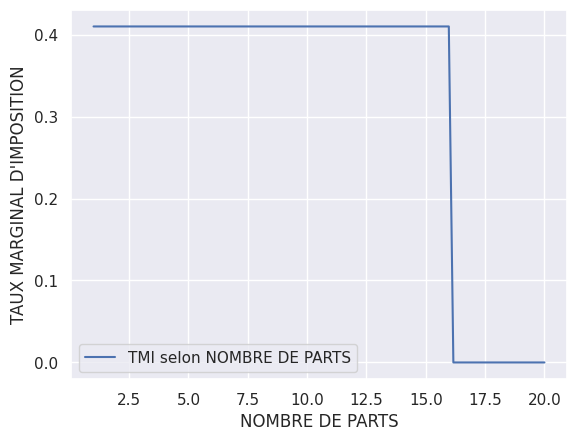

In [ ]:
scenario_nbptr = init_single_entity(
    tax_benefit_system.new_scenario(),
    axes=[
        [
            dict(
                count=STEPS_COUNT,
                min=1,
                max=20,
                name="nbptr",  # the variable that will evolve 'count' times between 'min' and 'max' values
            ),
        ],
    ],
    period=current_period,
    parent1=dict(
        statut_marital="celibataire",
    ),
    foyer_fiscal=dict(rni=IRPP_LAST_BRACKET_THRESHOLD + 1),
)

simulation_nbptr = scenario_nbptr.new_simulation()

# on récupère la valeur de rni du cas type
nbptr = simulation_nbptr.calculate("nbptr", 2022)

ir_taux_marginal = simulation_nbptr.calculate("ir_taux_marginal", current_period)
# print(ir_taux_marginal)

dessine_courbe(
    nbptr,
    ir_taux_marginal,
    "NOMBRE DE PARTS",
    "TAUX MARGINAL D'IMPOSITION",
    "TMI selon NOMBRE DE PARTS",
)